In [1]:
from simulation import Simulation
from rules_interpreter import *
from agents import Agente
from market  import Market
from market  import Cryptocurrency
from utils import *

In [2]:
# Ejemplo de creación de agentes y simulación
pertenencia_map = {
    "Bitcoin": {
        "precio": {
            "bajo": lambda precio: pertenencia_precio_bajo(precio, limite_inferior=15000, limite_superior=30000),
            "medio": lambda precio: pertenencia_precio_medio(precio, limite_inferior=30000, limite_superior=45000),
            "alto": lambda precio: pertenencia_precio_alto(precio, limite_inferior=45000, limite_superior=60000)
        },
        "volumen": {
            "bajo": lambda volumen: pertenencia_volumen_bajo(volumen, limite_inferior=1000, limite_superior=5000),
            "medio": lambda volumen: pertenencia_volumen_medio(volumen, limite_inferior=5000, limite_superior=10000),
            "alto": lambda volumen: pertenencia_volumen_alto(volumen, limite_inferior=10000, limite_superior=15000)
        },
        "sentimiento": {
            "negativo":lambda sentimiento: pertenencia_sentimiento_negativo(sentimiento),
            "neutro": lambda sentimiento: pertenencia_sentimiento_neutro(sentimiento),
            "positivo": lambda sentimiento: pertenencia_sentimiento_positivo(sentimiento)
        }
    },
    "Ethereum": {
        "precio": {
            "bajo": lambda precio: pertenencia_precio_bajo(precio, limite_inferior=1000, limite_superior=2000),
            "medio": lambda precio: pertenencia_precio_medio(precio, limite_inferior=2000, limite_superior=3000),
            "alto": lambda precio: pertenencia_precio_alto(precio, limite_inferior=3000, limite_superior=5000)
        },
        "volumen": {
            "bajo": lambda volumen: pertenencia_volumen_bajo(volumen, limite_inferior=1000, limite_superior=5000),
            "medio": lambda volumen: pertenencia_volumen_medio(volumen, limite_inferior=5000, limite_superior=10000),
            "alto": lambda volumen: pertenencia_volumen_alto(volumen, limite_inferior=10000, limite_superior=15000)
        },
        "sentimiento": {
            "negativo": lambda sentimiento: pertenencia_sentimiento_negativo(sentimiento),
            "neutro": lambda sentimiento: pertenencia_sentimiento_neutro(sentimiento),
            "positivo": lambda sentimiento: pertenencia_sentimiento_positivo(sentimiento)
        }
    }
}

In [3]:
# Simulación del mercado
btc=Cryptocurrency("Bitcoin",30000.0,0.9)
market=Market([btc])

# Cargar reglas desde archivos de texto
rules_buy_low_sell_high = load_rules_from_file('rules/rules_buy_low_sell_high.txt')
rules_momentum = load_rules_from_file('rules_momentum.txt')


rule_interpreter = ParserReglas(pertenencia_map)

# Crear brokers con diferentes estrategias
brokers = [
    Agente('Broker 1', rules_buy_low_sell_high,rule_interpreter),
    Agente('Broker 2', rules_momentum,rule_interpreter),
    Agente('Broker 3', rules_momentum,rule_interpreter),
    Agente('Broker 4', rules_buy_low_sell_high,rule_interpreter),
    Agente('Broker 5', rules_buy_low_sell_high,rule_interpreter)
]

simulation = Simulation(1000,brokers,market,rule_interpreter)
#print("market.cryptocurrencies")
#print(simulation.market.cryptocurrencies)
#print(simulation.sentiment_history)
simulation.run()

Broker 1 decidió: La regla sugiere no mantener en este contexto.
********* EJECUTAR ACCION*******
comprar
30000.0
100000
Broker 1 compró 3.0 unidades de Bitcoin a 30000.00 USD cada una.
Broker 2 decidió: La regla sugiere no mantener en este contexto.
********* EJECUTAR ACCION*******
vender
30000.0
100000
Broker 2 no tiene unidades de Bitcoin para vender.
Broker 3 decidió: La regla sugiere no mantener en este contexto.
********* EJECUTAR ACCION*******
comprar
30000.0
100000
Broker 3 compró 3.0 unidades de Bitcoin a 30000.00 USD cada una.
Broker 4 decidió: La regla sugiere no mantener en este contexto.
********* EJECUTAR ACCION*******
comprar
30000.0
100000
Broker 4 compró 3.0 unidades de Bitcoin a 30000.00 USD cada una.
Broker 5 decidió: La regla sugiere no mantener en este contexto.
********* EJECUTAR ACCION*******
vender
30000.0
100000
Broker 5 no tiene unidades de Bitcoin para vender.
Actualizando el mercado en 2024-09-17 19:03:28...
Trades en Bitcoin: []
Step 0: Timestamp = 2024-09-

In [4]:
for crypto, prices in simulation.price_history.items():
    print(f'{crypto}------{prices}')

Bitcoin------[30000.0, 30000.573263194718, 30000.58163975698, 30000.88452938355, 30000.87542042378, 30000.8910369009, 30001.18821946462, 30001.781159068603, 30002.091240836144, 30002.081185877378, 30002.383365387726, 30002.381113167943, 30002.67620661876, 30002.679751838685, 30002.975550737767, 30003.27821347852, 30003.587722268814, 30003.588083481005, 30003.594319897355, 30003.897607509294, 30004.494541340842, 30004.787461829004, 30005.072811069593, 30005.06806270581, 30005.373167144564, 30005.38113367165, 30005.68491132381, 30006.58622068668, 30007.181595374237, 30007.188238064486, 30007.49701097253, 30007.506331075183, 30007.80266658418, 30008.41755913126, 30008.424395689788, 30008.428846848234, 30008.420539899744, 30008.41178363536, 30008.723840559567, 30008.72632267622, 30009.031701213236, 30009.63879306163, 30009.949983277656, 30010.546072200097, 30010.843822773368, 30011.746257471103, 30011.724987531437, 30012.021682607923, 30012.325987375534, 30012.64028338309, 30012.9307392253

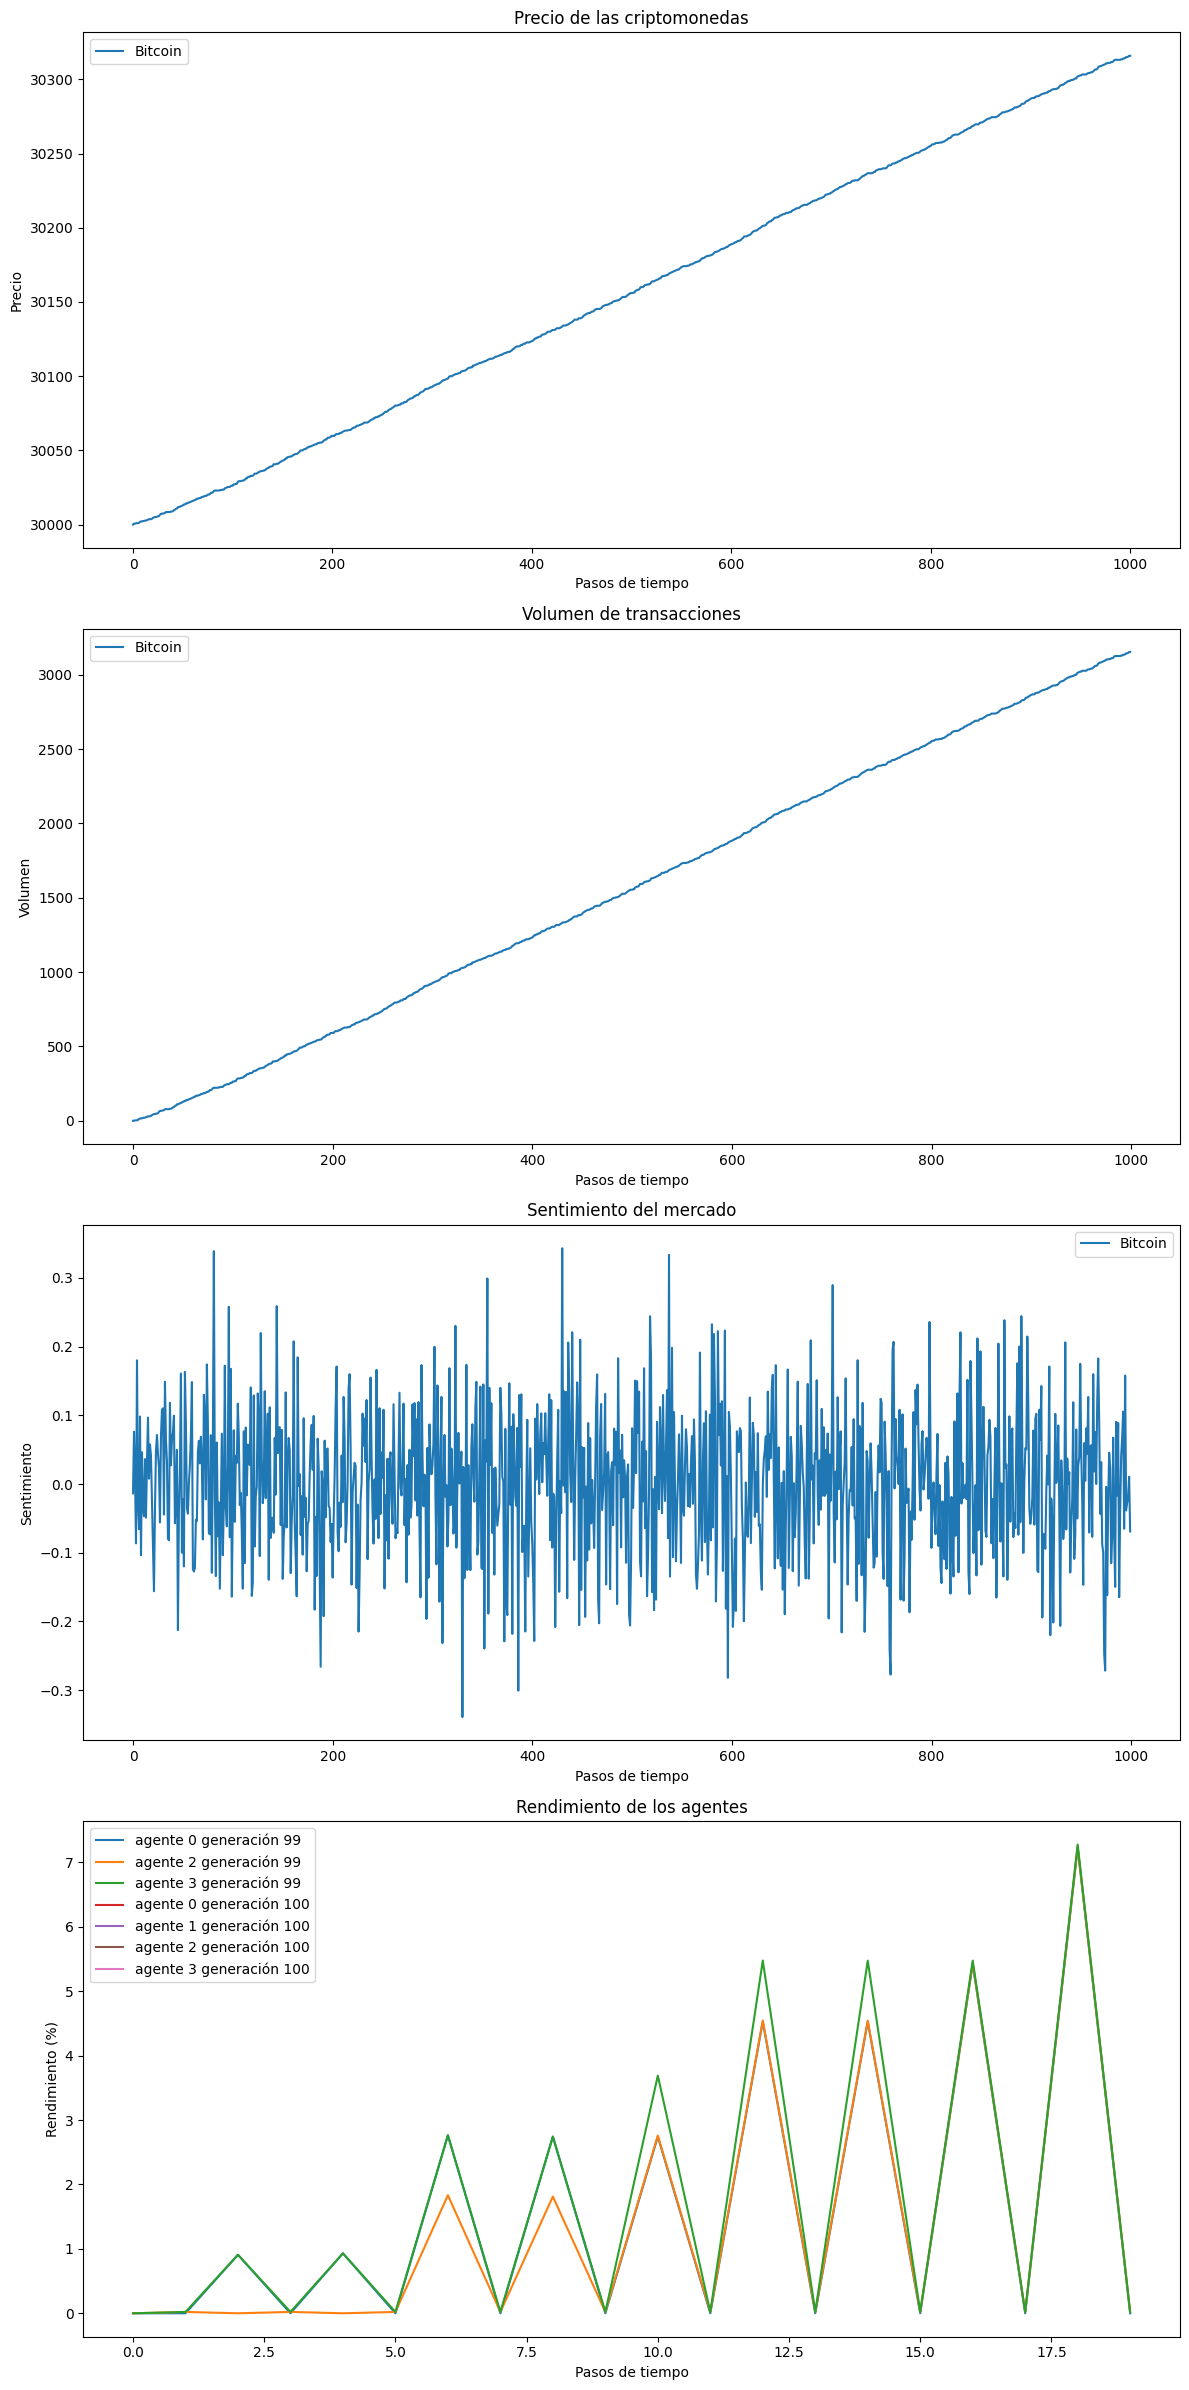

In [5]:
simulation.plot_results()

In [6]:
simulation.get_summary()
simulation.get_performance()

Resumen de la simulación:
Bitcoin:
  initial_price: 30000.0
  final_price: 30315.891229332818
  price_change: 1.0529707644427253
  max_price: 30315.897982290655
  min_price: 30000.0
  total_volume: 1566705.0

Rendimiento de los agentes:
agente 0 generación 99:
  initial_value: 10000000.00%
  final_value: 722.52%
  performance: -9999.28%
  max_performance: 72251.54%
  min_performance: 0.00%
  avg_performance: 31788.62%
agente 2 generación 99:
  initial_value: 10000000.00%
  final_value: 724.08%
  performance: -9999.28%
  max_performance: 72408.26%
  min_performance: 0.00%
  avg_performance: 28167.41%
agente 3 generación 99:
  initial_value: 10000000.00%
  final_value: 727.60%
  performance: -9999.27%
  max_performance: 72759.73%
  min_performance: 0.00%
  avg_performance: 34728.91%

La estrategia más efectiva fue: agente 3 generación 99




'agente 3 generación 99'